In [8]:
#Load Libraries
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob
import ntpath

In [10]:
#Function to load files
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']),133)
    return dog_files,dog_targets

In [31]:
#load files
train_files , train_targets = load_dataset('/Users/bhartisharma/Documents/DeepLearning/DogBreed---Classification/Udacity_data/dogImages/train')
valid_files, valid_targets = load_dataset('/Users/bhartisharma/Documents/DeepLearning/DogBreed---Classification/Udacity_data/dogImages/valid')
test_files,test_targets = load_dataset('/Users/bhartisharma/Documents/DeepLearning/DogBreed---Classification/Udacity_data/dogImages/test')

In [32]:
#Extracting Dog Breed names
dog_names = [item[20:-1] for item in sorted(glob('/Users/bhartisharma/Documents/DeepLearning/DogBreed---Classification/Udacity_data/dogImages/train/*/'))]

dog_breeds = []
for i in range(0,len(dog_names)):
    dog_breeds.append(ntpath.basename(dog_names[i]))

# Data Preprocessing

In [119]:
from keras.preprocessing import image
#add progress bars to Python code is with tqdm. 
from tqdm import tqdm

In [120]:
def path_to_tensor(img_path):
     # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path,target_size=(224,224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3) by using img_to_array
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor by using expand_dims
    return np.expand_dims(x,axis=0)
    
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

#vstack is vertical stack array

In [121]:
#load trucated images or incomplete images by using LOAD_TRUNCATED_IMAGES 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  

In [123]:
# Get the train, test and validation features of resnet 50
bottleneck_features = np.load('DogResnet50Data.npz')

train = bottleneck_features['train']
valid = bottleneck_features['valid']
test = bottleneck_features['test']

In [124]:
valid.shape

(835, 1, 1, 2048)

In [125]:
# Import important functions
from keras import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, MaxPooling2D, Flatten
from keras import regularizers

# Modelling with ResNet50

In [126]:
# Create a sequential model with the weights from the ResNet50 model as input 
model = Sequential()
model.add(Flatten(input_shape=train.shape[1:]))
model.add(Dense(len(dog_names), activation='softmax'))

In [127]:
# Print the model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [128]:
# Compile the model
model.compile(optimizer='rmsprop', metrics=['accuracy'], loss='categorical_crossentropy')

In [129]:
# Save the best model to disk
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights_new.best.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(train, train_targets, 
          validation_data=(valid, valid_targets),
          epochs=20, batch_size=10, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 9s 1ms/step - loss: 1.5102 - acc: 0.6148 - val_loss: 0.8448 - val_acc: 0.7473

Epoch 00001: val_loss improved from inf to 0.84477, saving model to weights_new.best.hdf5
Epoch 2/20
6680/6680 [==============================] - 5s 780us/step - loss: 0.4621 - acc: 0.8564 - val_loss: 0.7758 - val_acc: 0.7844

Epoch 00002: val_loss improved from 0.84477 to 0.77581, saving model to weights_new.best.hdf5
Epoch 3/20
6680/6680 [==============================] - 5s 739us/step - loss: 0.3117 - acc: 0.9028 - val_loss: 0.7781 - val_acc: 0.7928

Epoch 00003: val_loss did not improve from 0.77581
Epoch 4/20
6680/6680 [==============================] - 5s 743us/step - loss: 0.2312 - acc: 0.9244 - val_loss: 0.7677 - val_acc: 0.8012

Epoch 00004: val_loss improved from 0.77581 to 0.76772, saving model to weights_new.best.hdf5
Epoch 5/20
6680/6680 [==============================] - 5s 781us/step - loss: 

In [130]:
# Predict the values from our model
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in test]
# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 81.2201%


123.Pomeranian


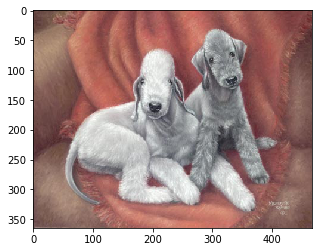

In [135]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
# Read Images 
#Input 'test' for Testing for breeds
test = 27


img = mpimg.imread(test_files[test]) 
# Output Images 
plt.imshow(img) 
i = predictions[test]
print(dog_breeds[i-1])

# Modelling with VGG19

In [136]:
# Get the train, test and validation features of resnet 50
bottleneck_features = np.load('DogVGG19Data.npz')

train = bottleneck_features['train']
valid = bottleneck_features['valid']
test = bottleneck_features['test']

In [137]:
# Create a sequential model with the weights from the VGG19 model as input 
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train.shape[1:]))
model.add(Dense(len(dog_names), activation='softmax'))

In [138]:
# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [140]:
checkpointer = ModelCheckpoint(filepath='weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train, train_targets, 
          validation_data=(valid, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 6s 900us/step - loss: 11.2179 - acc: 0.1504 - val_loss: 9.3338 - val_acc: 0.2659

Epoch 00001: val_loss improved from inf to 9.33376, saving model to weights.best.VGG19.hdf5
Epoch 2/20
6680/6680 [==============================] - 2s 334us/step - loss: 8.4285 - acc: 0.3515 - val_loss: 8.5191 - val_acc: 0.3437

Epoch 00002: val_loss improved from 9.33376 to 8.51914, saving model to weights.best.VGG19.hdf5
Epoch 3/20
6680/6680 [==============================] - 2s 321us/step - loss: 7.8332 - acc: 0.4310 - val_loss: 8.3483 - val_acc: 0.3713

Epoch 00003: val_loss improved from 8.51914 to 8.34828, saving model to weights.best.VGG19.hdf5
Epoch 4/20
6680/6680 [==============================] - 2s 335us/step - loss: 7.5477 - acc: 0.4687 - val_loss: 8.2908 - val_acc: 0.3796

Epoch 00004: val_loss improved from 8.34828 to 8.29080, saving model to weights.best.VGG19.hdf5
Epoch 5/20
6680/6680 [==

In [141]:
# Predict the values from our model
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in test]
# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 52.2727%


001.Affenpinscher


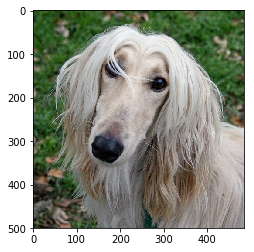

In [142]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
# Read Images 
#Input 'test' for Testing for breeds
test = 10


img = mpimg.imread(test_files[test]) 
# Output Images 
plt.imshow(img) 
i = predictions[test]
print(dog_breeds[i-1])